<a href="https://colab.research.google.com/github/huytranvan2010/Tensorflow-Certificate/blob/main/MnistFashion_callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Xây dựng mô hình phân loại bộ dữ liệu Fashion MNIST và sau cùng sẽ sử dụng callback để dừng training khi đạt được yêu cầu

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [2]:
# Load dữ liệu
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)


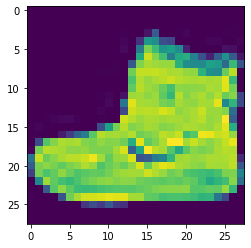

Label:  9


In [3]:
# Hiển thị một số dữ liệu
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print("Label: ", y_train[0])
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data?hl=vi

In [4]:
# Normalize
x_train = x_train /255.
x_test = x_test / 255.

In [6]:
model = Sequential([
                    Flatten(),      # do đang ở matrix nên cần flatten ra vector
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])


# do y_train ban đầu chưa chuyển về one-hot vẫn đang để nhận 1 giá trị với mỗi example do đó loss phải để sparse_categorical_cross entropy
# khi nào chuyển về one-hot thì dùng 'categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['acc'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6471 - acc: 0.7767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3891 - acc: 0.8605
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3395 - acc: 0.8750
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3118 - acc: 0.8861
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2902 - acc: 0.8957


In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3403 - acc: 0.8771


[0.3402705788612366, 0.8770999908447266]

In [10]:
predictions = model.predict(x_test)

print(predictions[0].argmax())
print(y_test[0])

9
9


Gộp chung lại tất cả và thêm phần callback

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = Sequential([
  Flatten(),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5917
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3622

Reached 60% accuracy so cancelling training!
